<a href="https://colab.research.google.com/github/csipop/TAREAS_MASTER/blob/main/Tarea_1_Limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar libreria

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder

In [ ]:
Renfe = pd.read_csv("/content/drive/MyDrive/Limpieza de datos/renfe.csv")

In [ ]:
Renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


# Vista inicial de los datos

In [ ]:
Renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [ ]:
Renfe.columns

Index(['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN', 'CIUDAD_ORIGEN',
       'CIUDAD_DESTINO', 'TIPO_TREN', 'TIPO_TARIFA', 'CLASE', 'PRECIO'],
      dtype='object')

In [ ]:
Renfe.describe()

,PRECIO
count,355038.000000
mean,61.435380
std,25.695934
min,0.000000
25%,41.200000
50%,58.150000
75%,76.300000
max,342.800000


In [ ]:
Renfe.shape

(383568, 9)

## Nulos

In [ ]:
Renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         38357
TIPO_TARIFA       39559
CLASE             39568
PRECIO            28530
dtype: int64

In [ ]:
Renfe.isnull().any()

FECHA_CONSULTA    False
FECHA_INICIO      False
FECHA_FIN         False
CIUDAD_ORIGEN     False
CIUDAD_DESTINO    False
TIPO_TREN          True
TIPO_TARIFA        True
CLASE              True
PRECIO             True
dtype: bool

# Fechas

In [ ]:
Renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [ ]:
Renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [ ]:
Renfe2=Renfe.copy()


In [ ]:
for i in ["FECHA_CONSULTA", "FECHA_INICIO", "FECHA_FIN"]:
  Renfe2[i] = pd.to_datetime(Renfe2[i])


In [ ]:
Renfe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       345211 non-null  object        
 6   TIPO_TARIFA     344009 non-null  object        
 7   CLASE           344000 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


# Duplicados

In [ ]:
Renfe2[Renfe2.duplicated(keep='first')]

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
67494,2019-04-29 23:15:13,2019-05-14 06:20:00,2019-05-14 14:25:00,MADRID,BARCELONA,LD-AVE,Promo,Turista,NaN
82429,2019-04-30 09:09:51,2019-05-19 17:30:00,2019-05-19 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
88401,2019-05-15 23:37:01,2019-06-21 21:05:00,2019-06-21 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
107458,2019-06-12 11:51:44,2019-06-16 17:30:00,2019-06-16 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,TuristaSólo plaza H,55.40
143395,2019-08-17 03:22:19,2019-09-01 21:03:00,2019-09-01 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,NaN
159167,2019-05-16 13:12:07,2019-06-29 21:05:00,2019-06-29 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
170659,2019-05-15 21:26:30,2019-06-23 21:05:00,2019-06-23 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
191339,2019-08-18 17:34:03,2019-08-23 21:03:00,2019-08-23 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
235466,2019-06-18 23:16:29,2019-07-23 07:00:00,2019-07-23 14:25:00,MADRID,BARCELONA,LD-AVE,Promo,Turista Plus,NaN
241656,2019-05-14 03:01:42,2019-07-07 21:05:00,2019-07-07 23:32:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,NaN


In [ ]:
Renfe2[Renfe2.duplicated].shape

(24, 9)

Vemos que existen valores duplicados en nuestro dataset, por lo que decidimos eliminarlos

In [ ]:
Renfe3=Renfe2.copy()

In [ ]:
Renfe3.drop_duplicates(inplace=True)

In [ ]:
Renfe3[Renfe3.duplicated].shape

(0, 9)

In [ ]:
Renfe3.reset_index(drop=True, inplace=True)

# Nuevas Variables

Creamos las variables Tiempo_viaje (variable que indica en minutos la duración del viaje) y Dif_ini_bus (variable que indica en minutos la diferencia entre la fecha de inicio de viaje y la fecha de búsqueda).

### Tiempo_viaje

In [ ]:
Renfe3['Tiempo_viaje'] = (Renfe3['FECHA_FIN'] - Renfe3['FECHA_INICIO'])/np.timedelta64(1,'m')

In [ ]:
Renfe3.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0


### Dif_ini_Bus

In [ ]:
Renfe3['Dif_ini_bus'] = (Renfe3['FECHA_INICIO'] - Renfe3['FECHA_CONSULTA'])/np.timedelta64(1, 'm')

In [ ]:
Renfe3.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333


## Pregunta 5

In [ ]:
Renfe4 = Renfe3.copy()

Este código nos va a separar las fechas en hora, día(nombre), día(número) y mes

In [ ]:
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
  Renfe4[col + '_HORA'] = Renfe4[col].dt.hour
  Renfe4[col + '_NOMBREDIA'] = Renfe4[col].dt.day_name()
  ##O.dt.weekday_name
  Renfe4[col + '_DIA'] = Renfe4[col].dt.day
  Renfe4[col + '_MES'] = Renfe4[col].dt.month

  del Renfe4[col]

Renfe4.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


# Analizamos los valores nulos y decidimos que hacer con ellos

In [ ]:
Renfe5=Renfe4.copy()

Porcentaje de nulos en cada variable

In [ ]:
Renfe5.isnull().sum()/(Renfe5.shape[0])*100

CIUDAD_ORIGEN                0.000000
CIUDAD_DESTINO               0.000000
TIPO_TREN                   10.000678
TIPO_TARIFA                 10.312767
CLASE                       10.315114
PRECIO                       7.434871
Tiempo_viaje                 0.000000
Dif_ini_bus                  0.000000
FECHA_CONSULTA_HORA          0.000000
FECHA_CONSULTA_NOMBREDIA     0.000000
FECHA_CONSULTA_DIA           0.000000
FECHA_CONSULTA_MES           0.000000
FECHA_INICIO_HORA            0.000000
FECHA_INICIO_NOMBREDIA       0.000000
FECHA_INICIO_DIA             0.000000
FECHA_INICIO_MES             0.000000
FECHA_FIN_HORA               0.000000
FECHA_FIN_NOMBREDIA          0.000000
FECHA_FIN_DIA                0.000000
FECHA_FIN_MES                0.000000
dtype: float64

En el target lo mejor es eliminar nulos y en las categoricas usar la moda

##Variable PRECIO


In [ ]:
Renfe5[Renfe5["PRECIO"].isnull()]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
12,PONFERRADA,MADRID,LD,NaN,Turista,NaN,346.0,23929.183333,15,Tuesday,23,4,6,Friday,10,5,11,Friday,10,5
28,MADRID,SEVILLA,AVE,Promo,Preferente,NaN,152.0,13069.116667,10,Saturday,13,4,12,Monday,22,4,14,Monday,22,4
33,SEVILLA,MADRID,INTERCITY,Flexible,TuristaSólo plaza H,NaN,160.0,14986.083333,9,Thursday,20,6,19,Sunday,30,6,21,Sunday,30,6
43,MADRID,VALENCIA,AVE,Promo,Turista,NaN,113.0,64738.833333,15,Friday,12,4,14,Monday,27,5,16,Monday,27,5
50,SEVILLA,MADRID,ALVIA,NaN,Turista,NaN,166.0,24497.816667,9,Thursday,20,6,9,Sunday,7,7,12,Sunday,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383437,MADRID,SEVILLA,ALVIA,Promo,NaN,NaN,153.0,56956.100000,5,Wednesday,17,4,18,Sunday,26,5,21,Sunday,26,5
383459,MADRID,VALENCIA,REGIONAL,Adulto ida,Turista,NaN,402.0,56615.083333,8,Saturday,13,4,16,Wednesday,22,5,22,Wednesday,22,5
383488,MADRID,SEVILLA,ALVIA,Promo,Turista,NaN,155.0,11783.000000,9,Wednesday,22,5,13,Thursday,30,5,16,Thursday,30,5
383498,SEVILLA,MADRID,ALVIA,Promo,Preferente,NaN,172.0,23607.766667,5,Friday,31,5,14,Sunday,16,6,17,Sunday,16,6


array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

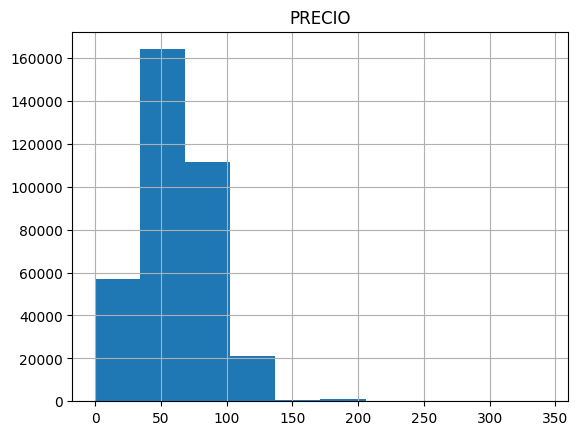

In [ ]:
Renfe5.hist('PRECIO')

In [ ]:
Renfe5[Renfe5["PRECIO"]<=0]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
121957,BARCELONA,MADRID,AVE,4x100,Turista,0.0,190.0,68338.650000,9,Monday,17,6,20,Saturday,3,8,23,Saturday,3,8
136921,BARCELONA,MADRID,AVE-TGV,Flexible,Preferente,0.0,175.0,5016.516667,1,Thursday,13,6,12,Sunday,16,6,15,Sunday,16,6


In [ ]:
#Eliminamos los valores nulos o cuyo precio es 0

Renfe5.drop(Renfe5[Renfe5["PRECIO"]<=0].index, axis=0, inplace=True)
Renfe5.dropna(subset=["PRECIO"], inplace=True)

##Variable TIPO_TREN

In [ ]:
Renfe5["TIPO_TREN"].value_counts()

TIPO_TREN
AVE          226695
ALVIA         19043
REGIONAL      16591
INTERCITY     16431
AV City        9214
MD-LD          6779
AVE-TGV        4455
R. EXPRES      4131
TRENHOTEL      3789
LD             3649
AVE-LD         2857
AVE-MD         2351
LD-MD          2346
MD-AVE          763
MD              489
Name: count, dtype: int64

In [ ]:
Renfe5[Renfe5["TIPO_TREN"].isnull()]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
25,BARCELONA,MADRID,NaN,Promo,Preferente,98.00,190.0,19008.400000,13,Tuesday,14,5,18,Monday,27,5,21,Monday,27,5
26,VALENCIA,MADRID,NaN,Promo,Turista,51.15,107.0,56798.450000,11,Wednesday,31,7,22,Sunday,8,9,23,Sunday,8,9
27,MADRID,VALENCIA,NaN,Promo,Turista,39.45,109.0,32980.550000,21,Monday,29,7,19,Wednesday,21,8,21,Wednesday,21,8
68,BARCELONA,MADRID,NaN,Promo,Turista,85.10,190.0,20331.716667,5,Monday,22,4,8,Monday,6,5,11,Monday,6,5
71,VALENCIA,MADRID,NaN,NaN,Turista,51.15,100.0,35414.316667,19,Tuesday,21,5,9,Saturday,15,6,11,Saturday,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383423,PONFERRADA,MADRID,NaN,NaN,Turista con enlace,54.10,256.0,34331.183333,15,Sunday,28,4,11,Wednesday,22,5,16,Wednesday,22,5
383424,MADRID,VALENCIA,NaN,Adulto ida,Turista,28.35,402.0,14679.733333,11,Friday,21,6,16,Monday,1,7,22,Monday,1,7
383444,VALENCIA,MADRID,NaN,NaN,Turista,45.30,107.0,61009.183333,13,Sunday,23,6,22,Sunday,4,8,23,Sunday,4,8
383486,MADRID,BARCELONA,NaN,Promo,Turista,66.75,171.0,56965.616667,1,Thursday,1,8,14,Monday,9,9,17,Monday,9,9


In [ ]:
#Sustituimos los nulos por la moda

Renfe5["TIPO_TREN"].fillna(Renfe5["TIPO_TREN"].mode()[0], inplace=True)

##Variable TIPO_TARIFA

In [ ]:
Renfe5["TIPO_TARIFA"].value_counts()

TIPO_TARIFA
Promo                      225957
Flexible                    65054
Adulto ida                  20727
Promo +                      7669
COD.PROMOCIONAL               144
Individual-Flexible            11
Mesa                            7
Doble Familiar-Flexible         3
Grupos Ida                      1
Name: count, dtype: int64

In [ ]:
Renfe5[Renfe5["TIPO_TARIFA"].isnull()]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
5,MADRID,SEVILLA,AVE,NaN,Preferente,69.35,158.0,65396.733333,23,Tuesday,20,8,9,Saturday,5,10,11,Saturday,5,10
13,VALENCIA,MADRID,AVE,NaN,NaN,27.80,100.0,82684.416667,23,Sunday,16,6,9,Tuesday,13,8,11,Tuesday,13,8
15,BARCELONA,MADRID,AVE,NaN,Turista,107.70,170.0,76428.266667,15,Saturday,18,5,17,Wednesday,10,7,19,Wednesday,10,7
17,MADRID,PONFERRADA,TRENHOTEL,NaN,Turista,45.80,377.0,32943.183333,1,Sunday,26,5,22,Monday,17,6,4,Tuesday,18,6
22,BARCELONA,MADRID,AVE,NaN,Preferente,68.95,165.0,84214.200000,1,Saturday,8,6,13,Monday,5,8,16,Monday,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383500,BARCELONA,MADRID,AVE,NaN,Turista,66.75,190.0,45882.183333,17,Sunday,12,5,14,Thursday,13,6,17,Thursday,13,6
383505,MADRID,VALENCIA,AVE,NaN,Turista,39.45,100.0,21183.383333,17,Tuesday,11,6,10,Wednesday,26,6,12,Wednesday,26,6
383518,SEVILLA,MADRID,AV City,NaN,Turista,43.55,172.0,49019.266667,20,Tuesday,30,7,21,Monday,2,9,23,Monday,2,9
383530,SEVILLA,MADRID,AVE,NaN,Turista Plus,64.05,152.0,17465.050000,16,Saturday,20,4,19,Thursday,2,5,22,Thursday,2,5


In [ ]:
#Sustituimos los nulos por la moda

Renfe5["TIPO_TARIFA"].fillna(Renfe5["TIPO_TARIFA"].mode()[0], inplace=True)

##Variable CLASE

In [ ]:
Renfe5["CLASE"].value_counts()

CLASE
Turista                     243859
Preferente                   30712
Turista Plus                 23320
Turista con enlace           19114
TuristaSólo plaza H           1951
PreferenteSólo plaza H         259
Cama Turista                   240
Cama G. Clase                   15
Turista PlusSólo plaza H         2
Name: count, dtype: int64

In [ ]:
Renfe5[Renfe5["CLASE"].isnull()]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
13,VALENCIA,MADRID,AVE,Promo,NaN,27.80,100.0,82684.416667,23,Sunday,16,6,9,Tuesday,13,8,11,Tuesday,13,8
37,MADRID,BARCELONA,AVE,Promo,NaN,88.95,150.0,50358.350000,17,Tuesday,14,5,17,Tuesday,18,6,19,Tuesday,18,6
54,SEVILLA,MADRID,AVE,Promo,NaN,61.45,152.0,63149.083333,14,Thursday,18,4,10,Saturday,1,6,13,Saturday,1,6
59,SEVILLA,MADRID,AVE,Promo,NaN,60.30,160.0,53024.983333,11,Saturday,18,5,7,Monday,24,6,9,Monday,24,6
70,SEVILLA,MADRID,AVE,Promo,NaN,47.30,150.0,25474.216667,21,Friday,17,5,13,Tuesday,4,6,16,Tuesday,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383526,MADRID,VALENCIA,INTERCITY,Promo,NaN,34.35,135.0,22649.983333,17,Thursday,22,8,11,Saturday,7,9,13,Saturday,7,9
383535,MADRID,BARCELONA,AVE,Flexible,NaN,127.10,150.0,7216.350000,15,Sunday,19,5,16,Friday,24,5,18,Friday,24,5
383537,VALENCIA,MADRID,INTERCITY,Promo,NaN,16.60,145.0,38981.033333,19,Tuesday,28,5,21,Monday,24,6,23,Monday,24,6
383539,MADRID,VALENCIA,AVE,Flexible,NaN,73.10,109.0,6628.116667,5,Monday,6,5,19,Friday,10,5,21,Friday,10,5


In [ ]:
#Sustituimos los nulos por la moda

Renfe5["CLASE"].fillna(Renfe5["CLASE"].mode()[0], inplace=True)

# Análisis de las variables

In [ ]:
Renfe6 = Renfe5.copy()

In [ ]:
Renfe6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355026 entries, 0 to 383543
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CIUDAD_ORIGEN             355026 non-null  object 
 1   CIUDAD_DESTINO            355026 non-null  object 
 2   TIPO_TREN                 355026 non-null  object 
 3   TIPO_TARIFA               355026 non-null  object 
 4   CLASE                     355026 non-null  object 
 5   PRECIO                    355026 non-null  float64
 6   Tiempo_viaje              355026 non-null  float64
 7   Dif_ini_bus               355026 non-null  float64
 8   FECHA_CONSULTA_HORA       355026 non-null  int32  
 9   FECHA_CONSULTA_NOMBREDIA  355026 non-null  object 
 10  FECHA_CONSULTA_DIA        355026 non-null  int32  
 11  FECHA_CONSULTA_MES        355026 non-null  int32  
 12  FECHA_INICIO_HORA         355026 non-null  int32  
 13  FECHA_INICIO_NOMBREDIA    355026 non-null  object

In [ ]:
target = ['PRECIO']

## Vamos a crear una función que identifique el tipo de cada variable del dataset de entrada.

In [ ]:
for i in Renfe6:
    print(i, Renfe6[i].dtype.kind)

CIUDAD_ORIGEN O
CIUDAD_DESTINO O
TIPO_TREN O
TIPO_TARIFA O
CLASE O
PRECIO f
Tiempo_viaje f
Dif_ini_bus f
FECHA_CONSULTA_HORA i
FECHA_CONSULTA_NOMBREDIA O
FECHA_CONSULTA_DIA i
FECHA_CONSULTA_MES i
FECHA_INICIO_HORA i
FECHA_INICIO_NOMBREDIA O
FECHA_INICIO_DIA i
FECHA_INICIO_MES i
FECHA_FIN_HORA i
FECHA_FIN_NOMBREDIA O
FECHA_FIN_DIA i
FECHA_FIN_MES i


In [ ]:
def obtener_lista_variables(dataset):

    lista_numericas=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!=2 and (i not in target):
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_categoricas

In [ ]:
lista_numericas, lista_categoricas = obtener_lista_variables(Renfe6)

In [ ]:
print("Las variables numéricas son:",lista_numericas)

Las variables numéricas son: ['Tiempo_viaje', 'Dif_ini_bus', 'FECHA_CONSULTA_HORA', 'FECHA_CONSULTA_DIA', 'FECHA_CONSULTA_MES', 'FECHA_INICIO_HORA', 'FECHA_INICIO_DIA', 'FECHA_INICIO_MES', 'FECHA_FIN_HORA', 'FECHA_FIN_DIA', 'FECHA_FIN_MES']


In [ ]:
print("Las variables categóricas son:",lista_categoricas)

Las variables categóricas son: ['CIUDAD_ORIGEN', 'CIUDAD_DESTINO', 'TIPO_TREN', 'TIPO_TARIFA', 'CLASE', 'FECHA_CONSULTA_NOMBREDIA', 'FECHA_INICIO_NOMBREDIA', 'FECHA_FIN_NOMBREDIA']


In [ ]:
print("Las variables target es:",target[0])

Las variables target es: PRECIO


In [ ]:
print(len(Renfe6.columns), "variables en total")
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_numericas), "variables numéricas")

20 variables en total
1 variable a predecir
8 variables categóricas
11 variables numéricas


### Análisis variables númericas

[[<Axes: title={'center': 'Tiempo_viaje'}>]]
[[<Axes: title={'center': 'Dif_ini_bus'}>]]
[[<Axes: title={'center': 'FECHA_CONSULTA_HORA'}>]]
[[<Axes: title={'center': 'FECHA_CONSULTA_DIA'}>]]
[[<Axes: title={'center': 'FECHA_CONSULTA_MES'}>]]
[[<Axes: title={'center': 'FECHA_INICIO_HORA'}>]]
[[<Axes: title={'center': 'FECHA_INICIO_DIA'}>]]
[[<Axes: title={'center': 'FECHA_INICIO_MES'}>]]
[[<Axes: title={'center': 'FECHA_FIN_HORA'}>]]
[[<Axes: title={'center': 'FECHA_FIN_DIA'}>]]
[[<Axes: title={'center': 'FECHA_FIN_MES'}>]]


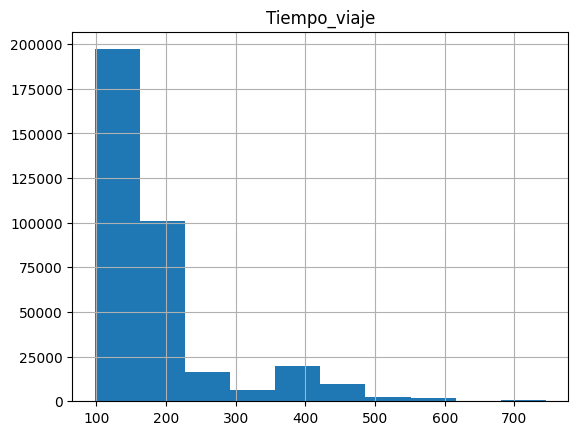

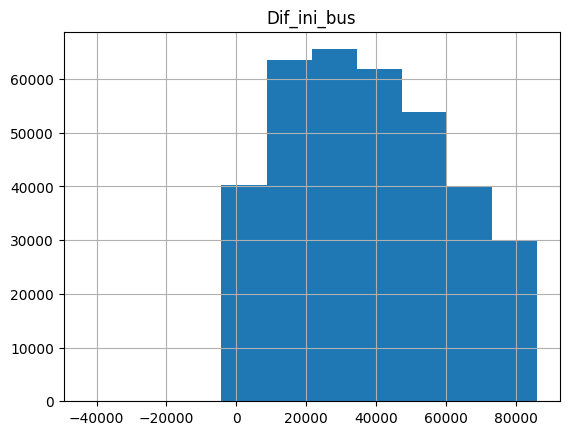

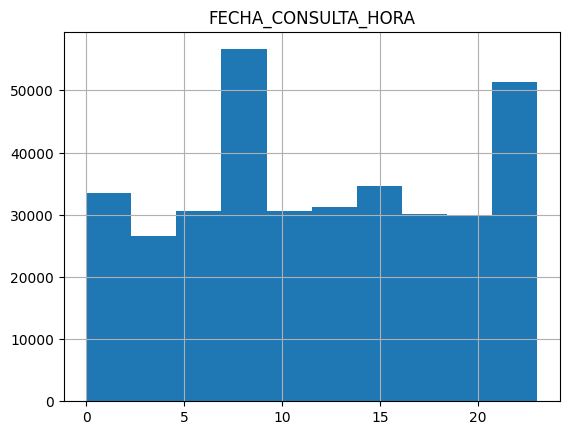

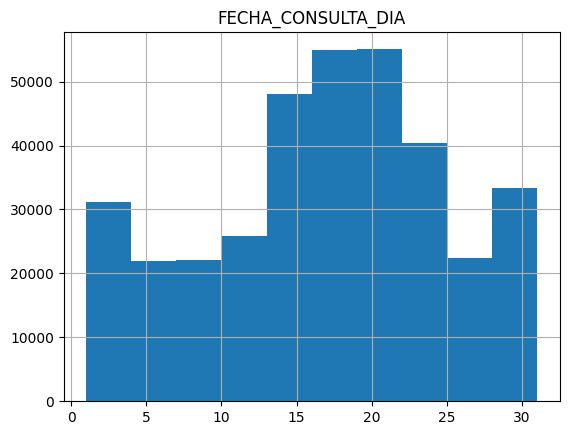

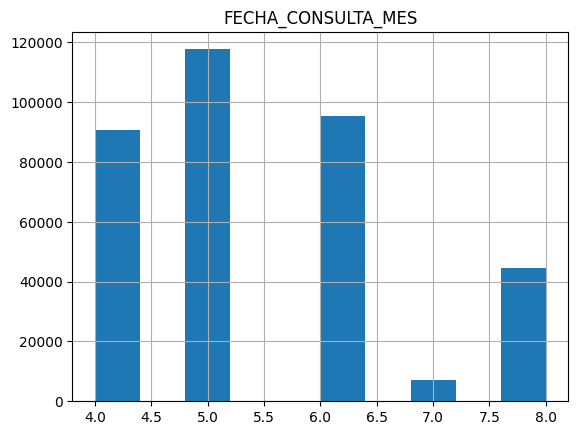

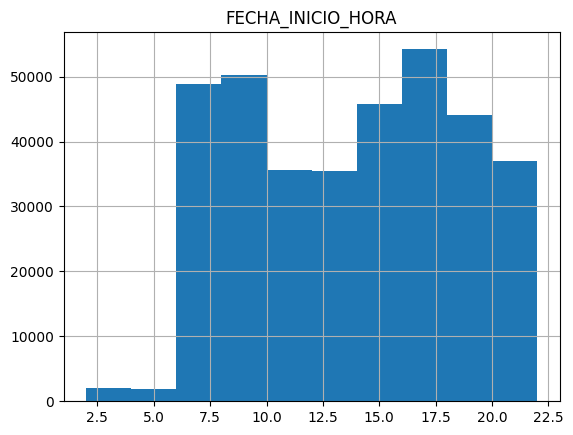

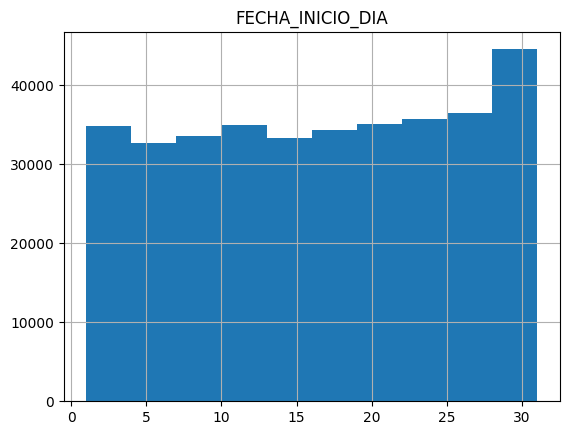

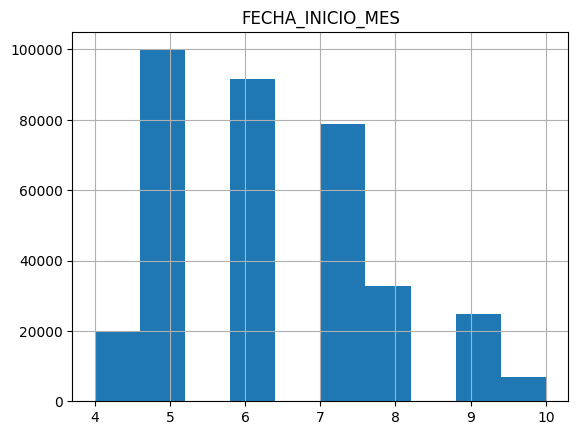

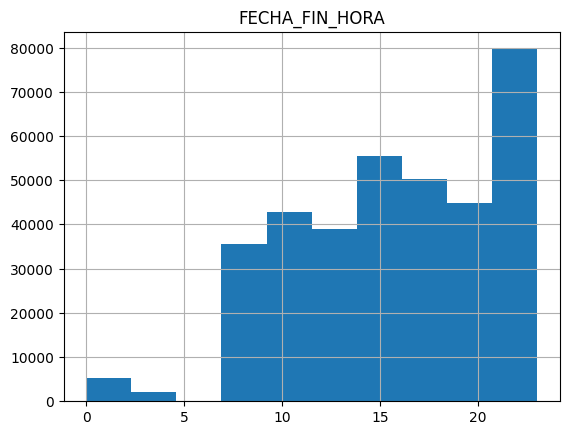

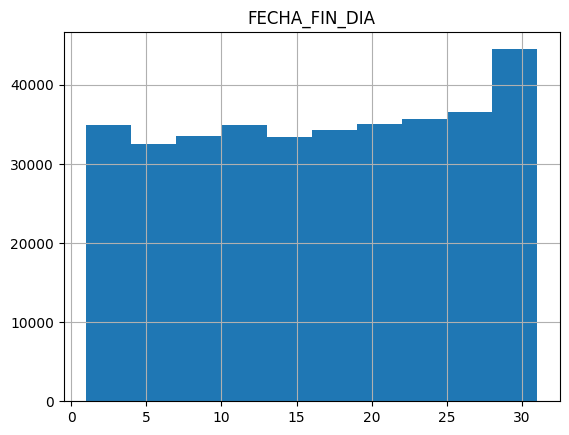

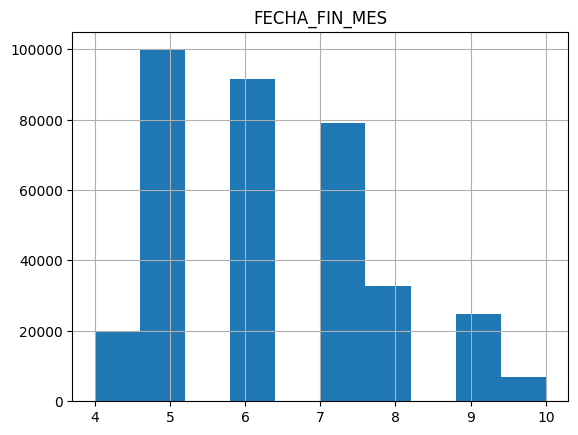

In [ ]:
for i in lista_numericas: # Loop en las variables numéricas
  print(Renfe6.hist(i))

Vemos que solo hay una variable dif_ini_bus con datos en negativo que no tienen sentido, y que solo tenemos datos entre el mes 4 y el mes 10

In [ ]:
Renfe6[Renfe6['Dif_ini_bus']<0]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
792,MADRID,SEVILLA,ALVIA,Flexible,PreferenteSólo plaza H,87.40,153.0,-12537.950000,11,Wednesday,14,8,18,Monday,5,8,21,Monday,5,8
956,MADRID,SEVILLA,AVE,Promo,Turista Plus,72.30,160.0,-276.666667,1,Tuesday,28,5,20,Monday,27,5,23,Monday,27,5
1372,MADRID,SEVILLA,MD-LD,Flexible,Turista con enlace,45.80,461.0,-721.800000,1,Tuesday,11,6,13,Monday,10,6,20,Monday,10,6
1463,SEVILLA,MADRID,ALVIA,Flexible,Preferente,87.40,166.0,-932.683333,1,Friday,24,5,9,Thursday,23,5,12,Thursday,23,5
1944,MADRID,VALENCIA,AVE,Promo,Turista,51.15,113.0,-690.116667,1,Thursday,2,5,14,Wednesday,1,5,16,Wednesday,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378267,SEVILLA,MADRID,AVE,Flexible,Turista,76.30,152.0,-508.516667,1,Friday,17,5,16,Thursday,16,5,19,Thursday,16,5
380897,PONFERRADA,MADRID,LD,Flexible,Turista con enlace,57.00,272.0,-503.900000,19,Wednesday,5,6,11,Wednesday,5,6,16,Wednesday,5,6
381080,SEVILLA,MADRID,AVE,Flexible,Turista,76.30,152.0,-401.266667,1,Saturday,27,4,18,Friday,26,4,21,Friday,26,4
381379,SEVILLA,MADRID,INTERCITY,Flexible,Turista,62.20,160.0,-366.083333,1,Thursday,20,6,19,Wednesday,19,6,21,Wednesday,19,6


Vamos a eliminar los valores negativos de la variable 'dif_ini_bus' porque al ser una variable de tiempo no tienen sentido

In [ ]:
Renfe6.drop(Renfe6[Renfe6["Dif_ini_bus"]<0].index, axis=0, inplace=True)

<Axes: >

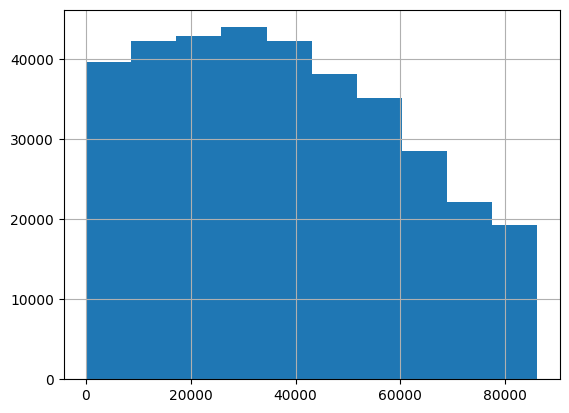

In [ ]:
Renfe6['Dif_ini_bus'].hist()

Eliminamos también las columnas con el detalle de la hora, el día y el mes de la consulta, puesto que la variable DIF_INI_BUS ya nos da información sobre con qué antelación se compran los billetes.

In [ ]:
for i in ("FECHA_CONSULTA_HORA", "FECHA_CONSULTA_NOMBREDIA", "FECHA_CONSULTA_DIA", "FECHA_CONSULTA_MES"):
  del(Renfe6[i])

In [ ]:
Renfe6.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_viaje,Dif_ini_bus,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,13,Wednesday,26,6,16,Wednesday,26,6


### Análisis de las variables categoricas

In [ ]:
for i in lista_categoricas:
  print(Renfe6.value_counts(i), '\n')

# Hay que limpiar las variables que tengan muy pocos valores

CIUDAD_ORIGEN
MADRID        176525
BARCELONA      59720
SEVILLA        53577
VALENCIA       51966
PONFERRADA     12725
Name: count, dtype: int64 

CIUDAD_DESTINO
MADRID        177988
BARCELONA      60587
VALENCIA       54588
SEVILLA        52972
PONFERRADA      8378
Name: count, dtype: int64 

TIPO_TREN
AVE          261764
ALVIA         19014
REGIONAL      16563
INTERCITY     16405
AV City        9193
MD-LD          6770
AVE-TGV        4449
R. EXPRES      4125
TRENHOTEL      3788
LD             3647
AVE-LD         2856
AVE-MD         2349
LD-MD          2342
MD-AVE          760
MD              488
Name: count, dtype: int64 

TIPO_TARIFA
Promo                      261192
Flexible                    64795
Adulto ida                  20696
Promo +                      7664
COD.PROMOCIONAL               144
Individual-Flexible            11
Mesa                            7
Doble Familiar-Flexible         3
Grupos Ida                      1
Name: count, dtype: int64 

CLASE
Turista        

Mirando las variables categóricas, vemos que hay dos columnas en las que algunos valores aparecen muy pocas veces: TIPO_TARIFA y CLASE. Vamos a eliminarlos.

In [ ]:
# La función hace lo siguiente:
#   - como parámetros de entrada tiene un dataset, el nombre de una columna y un valor umbral
#   - crea una lista vacía
#   - crea una tabla con los value counts de la columna del dataset que le pasamos como parámetro de entrada, a la que hace un reset index
#   - se recorre las filas del data set
#   - se pregunta si el nuevo dataset que tiene los conteos de los valores es menor al umbral
#   - en caso de que sea así se agrega en una lista

def obten_lista_eliminar(dataset, columna, umbral):

  lista_borrar = []
  tabla = dataset[columna].value_counts().reset_index()
  print(tabla)

  for i in range(0,len(tabla)):
    if (tabla.iloc[i]["count"]) < umbral:
      lista_borrar.append(tabla.iloc[i][columna])

  return lista_borrar

# Con esta función podemos eliminar aquellos valores que aparecen muy pocas veces (que serían outliers) de cada variable.

In [ ]:
Renfe7 = Renfe6.copy()

In [ ]:
lista_eliminar_tarifa = obten_lista_eliminar(Renfe7,"TIPO_TARIFA",400)

               TIPO_TARIFA   count
0                    Promo  261192
1                 Flexible   64795
2               Adulto ida   20696
3                  Promo +    7664
4          COD.PROMOCIONAL     144
5      Individual-Flexible      11
6                     Mesa       7
7  Doble Familiar-Flexible       3
8               Grupos Ida       1


In [ ]:
# Esta función tiene como parámetros de entrada un dataset, una columna y una lista.
# Elimina los valores de una columna del dataset que se encuentren en la lista.

def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [ ]:
eliminar_lista_df(Renfe7,"TIPO_TARIFA",lista_eliminar_tarifa)

In [ ]:
Renfe7["TIPO_TARIFA"].value_counts()

TIPO_TARIFA
Promo         261192
Flexible       64795
Adulto ida     20696
Promo +         7664
Name: count, dtype: int64

In [ ]:
lista_eliminar_clase = obten_lista_eliminar(Renfe7, "CLASE", 400)

                      CLASE   count
0                   Turista  278945
1                Preferente   30611
2              Turista Plus   23288
3        Turista con enlace   19094
4       TuristaSólo plaza H    1909
5    PreferenteSólo plaza H     258
6              Cama Turista     240
7  Turista PlusSólo plaza H       1
8             Cama G. Clase       1


In [ ]:
eliminar_lista_df(Renfe7,"CLASE",lista_eliminar_clase)

In [ ]:
Renfe7["CLASE"].value_counts()

CLASE
Turista                278945
Preferente              30611
Turista Plus            23288
Turista con enlace      19094
TuristaSólo plaza H      1909
Name: count, dtype: int64

### TIPO_TREN

Observamos que en esta variable existen valores duplicados que explican lo mismo pero con diferente nombre. Decidimos agrupar estos valores para simplificar el dataset

In [ ]:
Renfe7['TIPO_TREN'].value_counts()

TIPO_TREN
AVE          261575
ALVIA         18785
REGIONAL      16563
INTERCITY     16400
AV City        9190
MD-LD          6770
AVE-TGV        4441
R. EXPRES      4125
LD             3647
TRENHOTEL      3556
AVE-LD         2856
AVE-MD         2349
LD-MD          2342
MD-AVE          760
MD              488
Name: count, dtype: int64

In [ ]:
#Agrupamos LD-MD en MD-LD

Renfe7['TIPO_TREN'] = np.where(Renfe7['TIPO_TREN'] == 'LD-MD', 'MD-LD', Renfe7['TIPO_TREN'])

In [ ]:
#Agrupamos MD en MD-LD

Renfe7['TIPO_TREN'] = np.where(Renfe7['TIPO_TREN'] == 'MD', 'MD-LD', Renfe7['TIPO_TREN'])

In [ ]:
#Agrupamos LD en MD-LD

Renfe7['TIPO_TREN'] = np.where(Renfe7['TIPO_TREN'] == 'LD', 'MD-LD', Renfe7['TIPO_TREN'])

In [ ]:
#Agrupamos MD-AVE en AVE-MD

Renfe7['TIPO_TREN'] = np.where(Renfe7['TIPO_TREN'] == 'MD-AVE', 'AVE-MD', Renfe7['TIPO_TREN'])

In [ ]:
#Agrupamos LD-AVE en AVE-LD

Renfe7['TIPO_TREN'] = np.where(Renfe7['TIPO_TREN'] == 'LD-AVE', 'AVE-LD', Renfe7['TIPO_TREN'])

In [ ]:
Renfe7["TIPO_TREN"].value_counts()

TIPO_TREN
AVE          261575
ALVIA         18785
REGIONAL      16563
INTERCITY     16400
MD-LD         13247
AV City        9190
AVE-TGV        4441
R. EXPRES      4125
TRENHOTEL      3556
AVE-MD         3109
AVE-LD         2856
Name: count, dtype: int64

#Guardamos el dataset en un fichero pickle

In [ ]:
pd.to_pickle(Renfe7,"/content/drive/MyDrive/Limpieza de datos/df_renfe_clean")

https://docs.google.com/forms/d/e/1FAIpQLSeE9CcoIx49ALwsSMB7TJlNlpAx3b_NR6opJS9YAoFZrRGxjg/viewform

https://docs.google.com/forms/d/e/1FAIpQLSeymVhnJwvhsrbuGuc9-597b2hCyccA6epCBo0aoiAvuwaWSQ/viewform